<a href="https://colab.research.google.com/github/Nithishkumar13/breast-cancer-classification/blob/main/Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BREAST CANCER CLASSIFICATION 

IMPORTING REQUIRED MODULES


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings(action='ignore')

cancer = load_breast_cancer()
print("cancer dataset imported sucessfully")

In [17]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
df=pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])
df['target']=cancer['target']
df.head()

In [22]:
df['target'].unique()

array([0, 1])

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

# VISUALIZATION 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


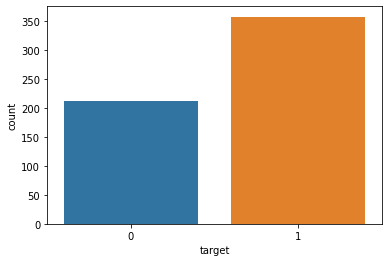

In [31]:
sns.countplot(df['target'])

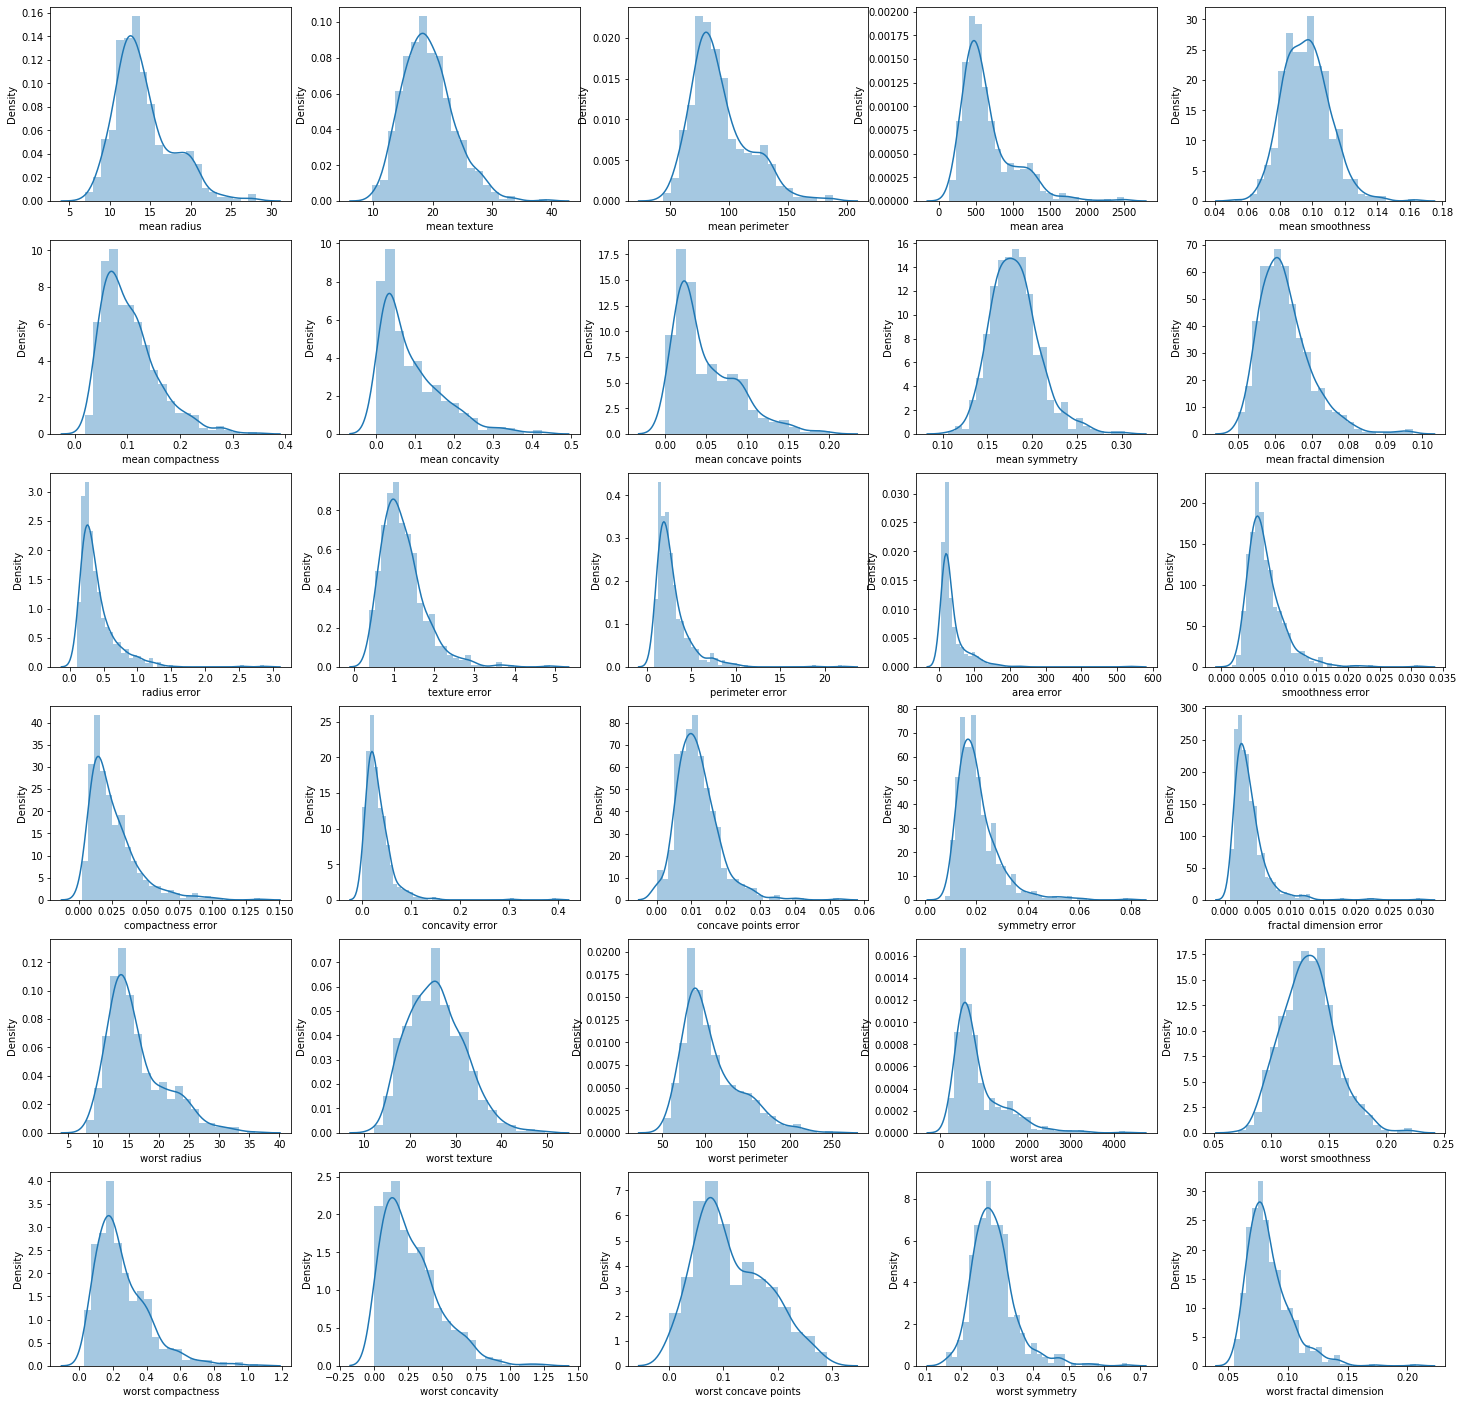

In [41]:
figure=plt.figure(figsize=(25,25))
for i,j in zip(range(1,31),df.columns[:31]):
  ax=figure.add_subplot(6,5,i)
  sns.distplot(df[j],ax=ax)
plt.show()

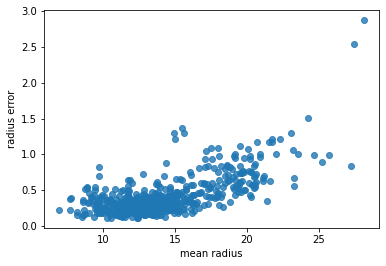

In [46]:
sns.regplot(df['mean radius'],df['radius error'],fit_reg=False)

# STANDARDIZE THE VARIABLES



In [ ]:
sc=StandardScaler()
x_scaled=sc.fit_transform(df.drop('target',axis=1))

In [ ]:
y=df['target']

# TRAIN TEST SPLIT

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=40,test_size=0.3)

# KNEIGHBORS CLASSIFIER

In [ ]:
k=1
knn=KNeighborsClassifier(n_neighbors=k)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

# FINDING HIGHEST ACCURACY BY TRAIL AND ERROR

In [ ]:
accuracy=[]
for i in range(1,41):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy+=[accuracy_score(y_test,y_pred)]

In [ ]:
plt.scatter(range(1,41),accuracy)
plt.plot(range(1,41),accuracy)
plt.xlabel('neighbors(k)')
plt.ylabel('accuracy')
plt.title('neighbors vs accuracy')
plt.grid(True)
plt.show()

In [ ]:
print('achiveing heighest accuracy by k={} ,accuracy {:.3f}'.format(15,accuracy[14]))